## Load Libraries and Data

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [85]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [86]:
df.shape

(103904, 25)

In [4]:
# column names lowercase and no_space
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.drop(columns=['unnamed:_0', 'id'], inplace=True)

In [6]:
df.isna().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

In [7]:
df.dropna(inplace=True)

## Feature Engineering
gender, customer_type, type_of_travel, satisfaction all boolean -> OneBigEncoder//
class is ordinal

In [91]:
df.describe(include='O')

,gender,customer_type,type_of_travel,class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


<Axes: xlabel='class'>

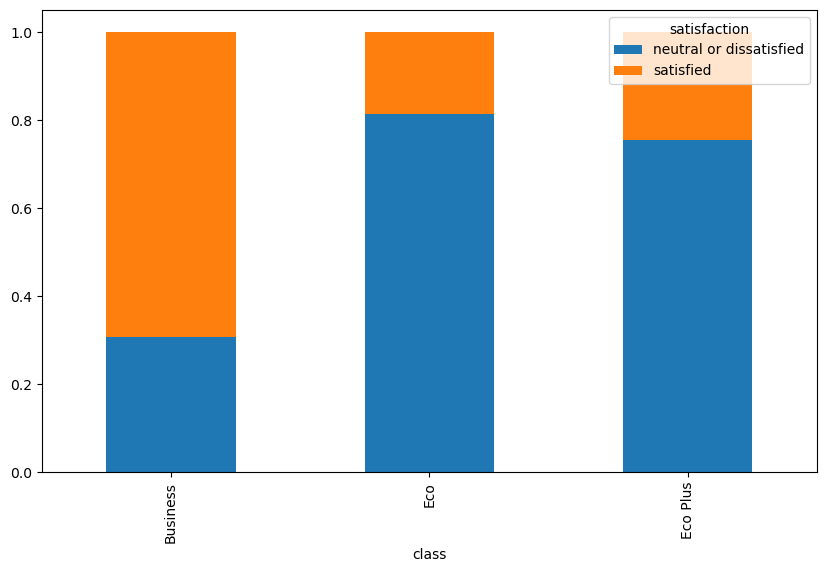

In [92]:
#is class an ordinal value?
df.groupby(['class'])['satisfaction'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

In [8]:
#class as ordinal value
df['class'] = df['class'].map({'Eco': 1, 'Eco Plus': 2, 'Business': 3})

In [9]:
#turn columns to boolean
df['gender'] = (df['gender'] == 'Female').astype(int)
df['customer_type'] = (df['customer_type'] == 'Loyal Customer').astype(int)
df['type_of_travel'] = (df['type_of_travel'] == 'Business travel').astype(int)
df['satisfaction'] = (df['satisfaction'] == 'satisfied').astype(int)
df.dtypes

gender                                 int32
customer_type                          int32
age                                    int64
type_of_travel                         int32
class                                  int64
flight_distance                        int64
inflight_wifi_service                  int64
departure/arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

In [10]:
df['satisfaction'].value_counts()

satisfaction
0    58697
1    44897
Name: count, dtype: int64

In [65]:
# #Using One Hot Encoding for categorical variables
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(handle_unknown = 'ignore')
# df_encoded = encoder.fit_transform(df[['gender', 'customer_type', 'type_of_travel', 'satisfaction']])
# df_encoded = pd.DataFrame(df_encoded.toarray(), columns=encoder.get_feature_names_out())
# df_encoded.head()

,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [12]:
df.to_csv('data/cleaned_airline_passenger_satisfaction.csv', index=False)

## Box Plots

In [ ]:
px.box(df, x='survey_col', y=b_selected_col, title=chart_title, color='satisfaction')

## Outliers

In [11]:
# eliminate upper bound outliers
col = ['flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
df_outliers = df[df[col].gt(df[col].quantile(0.99)).any(axis=1)]
df = df[~df.index.isin(df_outliers.index)]
df_outliers.shape

(2169, 23)

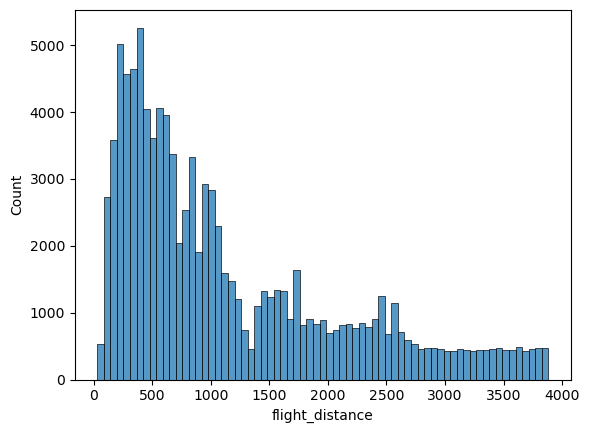

In [80]:
sns.histplot(data=df, x='flight_distance');

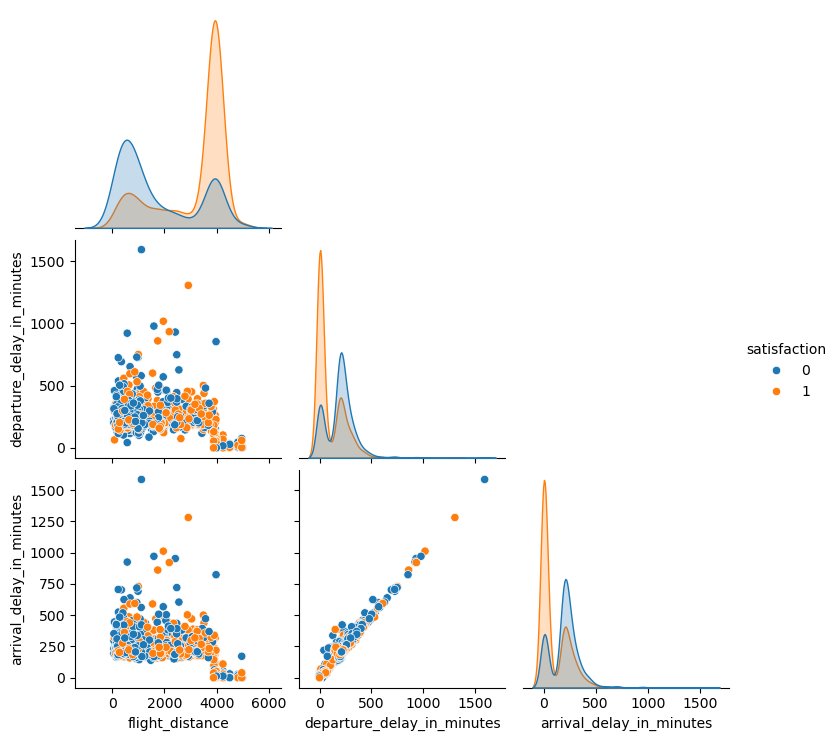

In [13]:
sns.pairplot(data = df_outliers,
             vars = ['flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes'],
             hue = 'satisfaction',
             corner=True);

In [14]:
import plotly.express as px

In [15]:
px.pairplot(data = df_outliers,
             vars = ['flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes'],
             hue = 'satisfaction',
             corner=True);

AttributeError: module 'plotly.express' has no attribute 'pairplot'

In [16]:
df['gender'].value_counts().to_dict()

{1: 51483, 0: 49942}

In [39]:
df.groupby('satisfaction')['type_of_travel'].mean()

satisfaction
0    0.505820
1    0.925771
Name: type_of_travel, dtype: float64

<Axes: xlabel='age'>

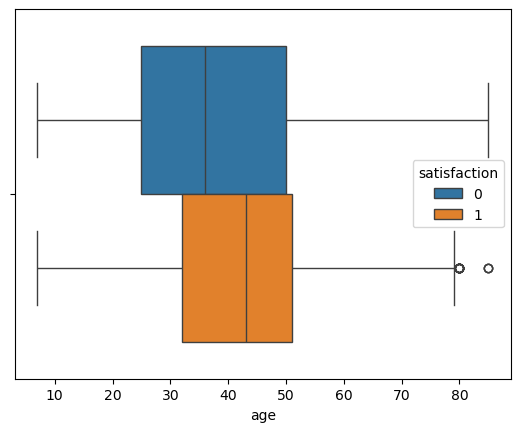

In [38]:
sns.boxplot(data=df, x = 'age', hue='satisfaction')

In [ ]:
# .loc[INDEX]
df.loc[(df['inflight_wifi_service'] == 0) & (df['satisfaction'] == 0)]

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
17561,0,1,22,1,1,569,0,5,5,5,...,0,4,5,3,3,3,0,0,0.0,0
21706,0,1,24,1,2,612,0,1,4,4,...,0,3,5,4,1,3,0,0,0.0,0
45447,1,1,22,1,2,456,0,4,4,4,...,0,4,1,3,2,3,0,0,0.0,0
46112,1,1,12,1,2,888,0,5,5,5,...,0,3,4,3,4,4,0,11,2.0,0
49507,1,1,22,1,2,404,0,1,1,1,...,0,4,5,3,2,4,0,0,0.0,0
60740,0,1,23,1,2,1984,0,1,1,1,...,0,1,4,4,4,3,0,0,0.0,0
67666,0,1,26,1,1,999,0,2,3,2,...,0,4,4,4,2,3,0,0,0.0,0
84321,0,1,21,1,1,689,0,1,1,1,...,0,2,5,3,2,3,0,0,0.0,0
